# Porównanie wyników pomiarów wydajności QuadTree and KDTree

In [1]:
# Import data libraries, graph and timers
import pandas as pd
import matplotlib.pyplot as plt
from time import process_time
# Imports geometry utilities
from utilities.Point import Point
from utilities.Rectangle import Rectangle
# Imports modules for testing, benchmarking and visualizing
from visualizer.main import Visualizer
from comparator.CaseGenerator import CaseGenerator
from TestManager import TestManager
# Imports data structures (and their visualizers)
from KdTree import KdTree, KdTree_visualizer
from QuadTree import QuadTree, QuadTree_visualizer

## Spis treści:
1. Sprawdzenie poprawności działania porównywanych struktur danych
2. Pomiary wydajności dla różnych rozmiarów danych oraz rodzaju danych wejściowych
3. Generowanie wykresów
4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

## 1. Sprawdzenie poprawności działania porównywanych struktur danych

KdTree:

In [92]:
KdTree_tests = TestManager(KdTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


QuadTree:

In [93]:
QuadTree_tests = TestManager(QuadTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


Weryfikacja:

In [94]:
assert KdTree_tests and QuadTree_tests
print("All tests passed!")

All tests passed!


## 2. Pomiary wydajności

In [2]:
cg = CaseGenerator()
q_int = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000]
q_2int = [(val//2, val//2) for val in q_int]
q_grid = [(100, val//100) for val in q_int]
q_clust = [val//3 for val in q_int]
q_out = [(val, 50) for val in q_int]

def benchmark(func, quantities, search_in=Rectangle([25, 25], [75, 75]), destination=Rectangle(Point([0,0]), Point([100,100])), cluster=None, title="Benchmark"):
    global q_int
    data = []
    data2 = []
    for q in quantities:
        if cluster is not None:
            points = func(q, cluster)
        else:
            points = func(q, destination)
        tk1 = process_time()
        kd = KdTree(points, points_in_node=1)
        tk2 = process_time()
        tq1 = process_time()
        quad = QuadTree(points, points_in_node=1)
        tq2 = process_time()
        tk3 = process_time()
        kd.search_in_rectangle(search_in)
        tk4 = process_time()
        tq3 = process_time()
        quad.search_in_rectangle(search_in)
        tq4 = process_time()
        data.append((tk2 - tk1, tq2 - tq1))
        data2.append((tk4 - tk3, tq4 - tq3))
    qua = ["Liczba punktów"]    
    col = ["KdTree", "QuadTree"]
    top = ["", "Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(1, len(quantities) + 1))
    df = pd.concat([pd.concat([pd.DataFrame(q_int, columns=qua, index=idx), 
                    pd.DataFrame(data, columns=col, index=idx), 
                    pd.DataFrame(data2, columns=col, index=idx)], axis=1, keys=top)], axis=1, keys=[title])
    return df


2.1 Rozkład jednorodny

In [96]:
df1 = benchmark(cg.uniform_distribution, q_int, title="Rozkład jednorodny")
df1

Rozkład jednorodny                                                         \
                      Czas konstrukcji [s]           Czas przeszukiwania [s]   
       Liczba punktów               KdTree  QuadTree                  KdTree   
1                2500             0.046875  0.093750                0.000000   
2                5000             0.125000  0.203125                0.000000   
3                7500             0.484375  0.562500                0.000000   
4               10000             1.078125  0.984375                0.000000   
5               12500             1.265625  1.375000                0.000000   
6               15000             1.093750  1.562500                0.000000   
7               17500             0.875000  1.234375                0.000000   
8               20000             1.281250  1.375000                0.015625   
9               22500             1.421875  1.703125                0.000000   
10              25000             1.781250  1.781250                0.000000   

              
              
    QuadTree  
1   0.000000  
2   0.015625  
3   0.015625  
4   0.015625  
5   0.015625  
6   0.015625  
7   0.015625  
8   0.015625  
9   0.015625  
10  0.015625

2.2 Rozkład normalny

In [97]:
df2 = benchmark(cg.normal_distribution, q_int, title="Rozkład normalny")
df2

Rozkład normalny                                                         \
                    Czas konstrukcji [s]           Czas przeszukiwania [s]   
     Liczba punktów               KdTree  QuadTree                  KdTree   
1              2500             0.062500  0.156250                0.000000   
2              5000             0.187500  0.281250                0.000000   
3              7500             0.500000  0.578125                0.015625   
4             10000             0.546875  0.531250                0.015625   
5             12500             0.781250  0.953125                0.015625   
6             15000             0.890625  1.125000                0.000000   
7             17500             0.796875  1.203125                0.015625   
8             20000             1.156250  1.750000                0.015625   
9             22500             1.328125  1.718750                0.015625   
10            25000             1.484375  1.765625                0.015625   

              
              
    QuadTree  
1   0.000000  
2   0.015625  
3   0.000000  
4   0.000000  
5   0.015625  
6   0.015625  
7   0.015625  
8   0.000000  
9   0.015625  
10  0.015625

2.3 Rozkład "posadzka"

In [98]:
df3 = benchmark(cg.grid_distribution, q_grid, title="Rozkład siatka")
df3

Rozkład siatka                                                         \
                  Czas konstrukcji [s]           Czas przeszukiwania [s]   
   Liczba punktów               KdTree  QuadTree                  KdTree   
1            2500             0.093750  0.187500                0.015625   
2            5000             0.281250  0.218750                0.015625   
3            7500             0.500000  0.343750                0.000000   
4           10000             0.546875  0.421875                0.000000   
5           12500             0.593750  0.671875                0.000000   
6           15000             0.765625  0.578125                0.000000   
7           17500             0.906250  1.171875                0.015625   
8           20000             1.359375  2.031250                0.000000   
9           22500             1.109375  1.531250                0.015625   
10          25000             1.390625  1.687500                0.015625   

              
              
    QuadTree  
1   0.000000  
2   0.000000  
3   0.000000  
4   0.015625  
5   0.000000  
6   0.000000  
7   0.000000  
8   0.000000  
9   0.000000  
10  0.000000

2.4 Rozkład klastrowy

In [99]:
c = (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30])))
df4 = benchmark(cg.cluster_distribution, q_clust, search_in=Rectangle([30, 50], [70, 80]), cluster=c, title="Rozkład klastrowy")
df4

Rozkład klastrowy                                                         \
                     Czas konstrukcji [s]           Czas przeszukiwania [s]   
      Liczba punktów               KdTree  QuadTree                  KdTree   
1               2500             0.078125  0.093750                0.000000   
2               5000             0.250000  0.265625                0.000000   
3               7500             0.578125  0.421875                0.000000   
4              10000             0.609375  0.718750                0.000000   
5              12500             0.703125  0.890625                0.015625   
6              15000             0.640625  1.468750                0.015625   
7              17500             1.390625  1.984375                0.015625   
8              20000             1.109375  1.687500                0.000000   
9              22500             1.359375  1.750000                0.015625   
10             25000             1.640625  2.718750                0.015625   

              
              
    QuadTree  
1   0.000000  
2   0.000000  
3   0.000000  
4   0.000000  
5   0.000000  
6   0.000000  
7   0.000000  
8   0.015625  
9   0.000000  
10  0.000000

2.5 Rozkład z wartościami odstającymi

In [ ]:
df5 = benchmark(cg.outliers_distribution, q_out, title="Rozkład z odstającymi")

2.6 Rozkład krzyżowy

In [109]:
df6 = benchmark(cg.cross_distribution, q_2int, title="Rozkład krzyż")
df6

Rozkład krzyż                                                         \
                  Czas konstrukcji [s]           Czas przeszukiwania [s]   
   Liczba punktów               KdTree  QuadTree                  KdTree   
1            2500             0.078125  0.390625                0.000000   
2            5000             0.187500  0.484375                0.015625   
3            7500             0.515625  0.937500                0.000000   
4           10000             0.421875  1.546875                0.015625   
5           12500             0.531250  2.031250                0.015625   
6           15000             0.703125  1.656250                0.000000   
7           17500             0.796875  2.890625                0.000000   
8           20000             1.078125  3.375000                0.000000   
9           22500             1.296875  3.828125                0.015625   
10          25000             1.703125  3.625000                0.015625   

              
              
    QuadTree  
1   0.000000  
2   0.000000  
3   0.000000  
4   0.000000  
5   0.000000  
6   0.000000  
7   0.015625  
8   0.015625  
9   0.015625  
10  0.015625

2.7 Rozkład prostokątny

In [101]:
df7 = benchmark(cg.rectangle_distribution, q_int, search_in=Rectangle([20,20], [70,100]), title="Rozkład prostokąt")
df7

Rozkład prostokąt                                                         \
                     Czas konstrukcji [s]           Czas przeszukiwania [s]   
      Liczba punktów               KdTree  QuadTree                  KdTree   
1               2500             0.078125  0.140625                0.000000   
2               5000             0.187500  1.093750                0.000000   
3               7500             0.421875  0.843750                0.000000   
4              10000             0.406250  1.750000                0.000000   
5              12500             0.906250  2.578125                0.015625   
6              15000             1.000000  2.546875                0.015625   
7              17500             0.765625  3.625000                0.015625   
8              20000             1.156250  2.750000                0.000000   
9              22500             1.000000  3.062500                0.000000   
10             25000             0.625000  4.984375                0.000000   

              
              
    QuadTree  
1   0.015625  
2   0.000000  
3   0.000000  
4   0.000000  
5   0.000000  
6   0.000000  
7   0.000000  
8   0.015625  
9   0.000000  
10  0.000000

## 3. Generowanie wykresów

In [102]:
def show_graphs(df, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["KdTree"], label="KdTree", marker="o")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Liczba punktów")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["KdTree"], label="KdTree", marker="o")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Liczba punktów")
    ax2.legend()
    plt.show()    

3.1 Rozkład równomierny

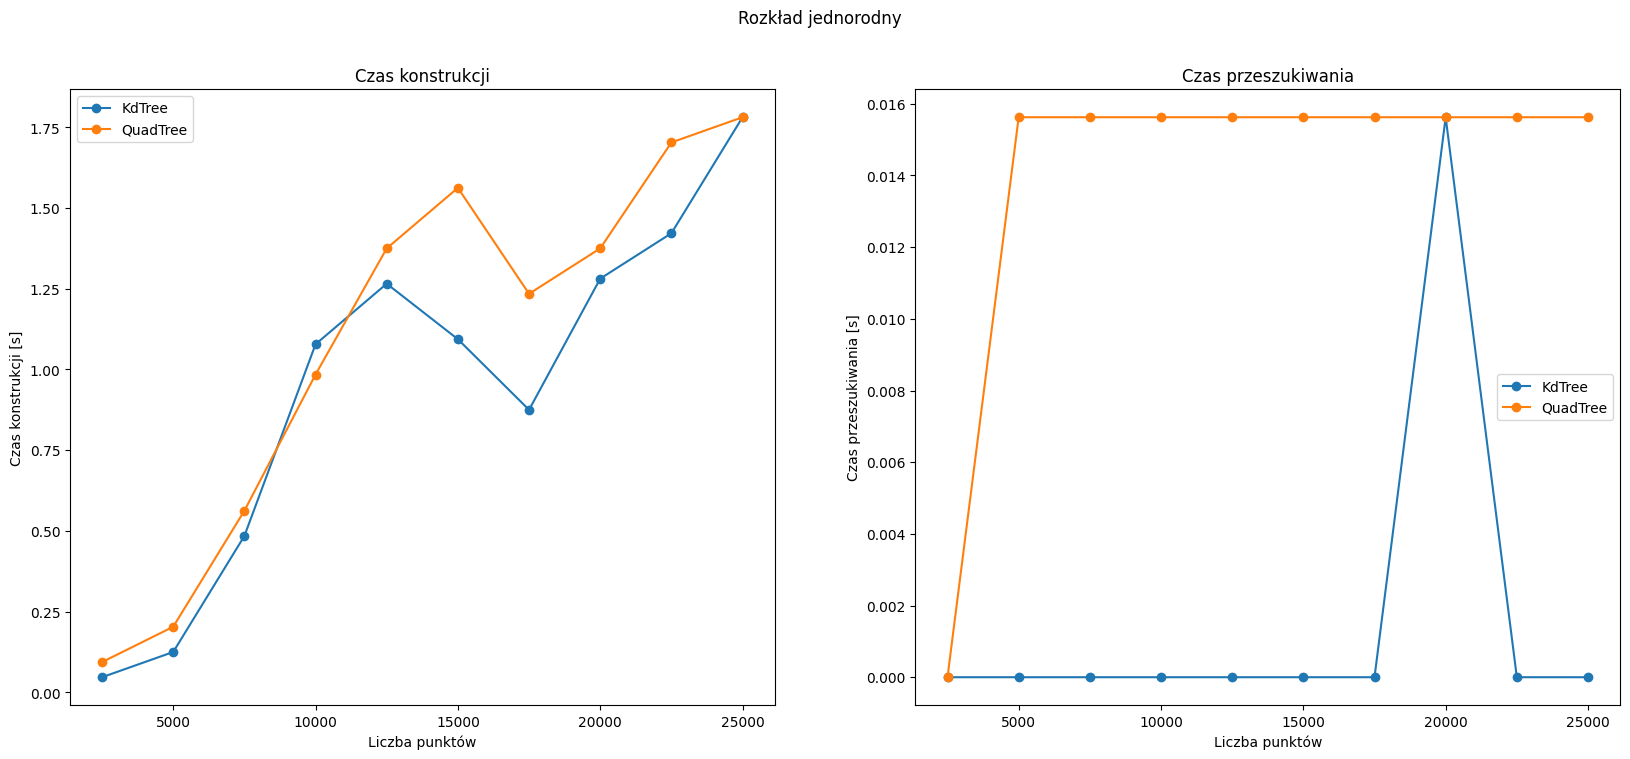

In [103]:
show_graphs(df1, "Rozkład jednorodny")

3.2 Rozkład normalny

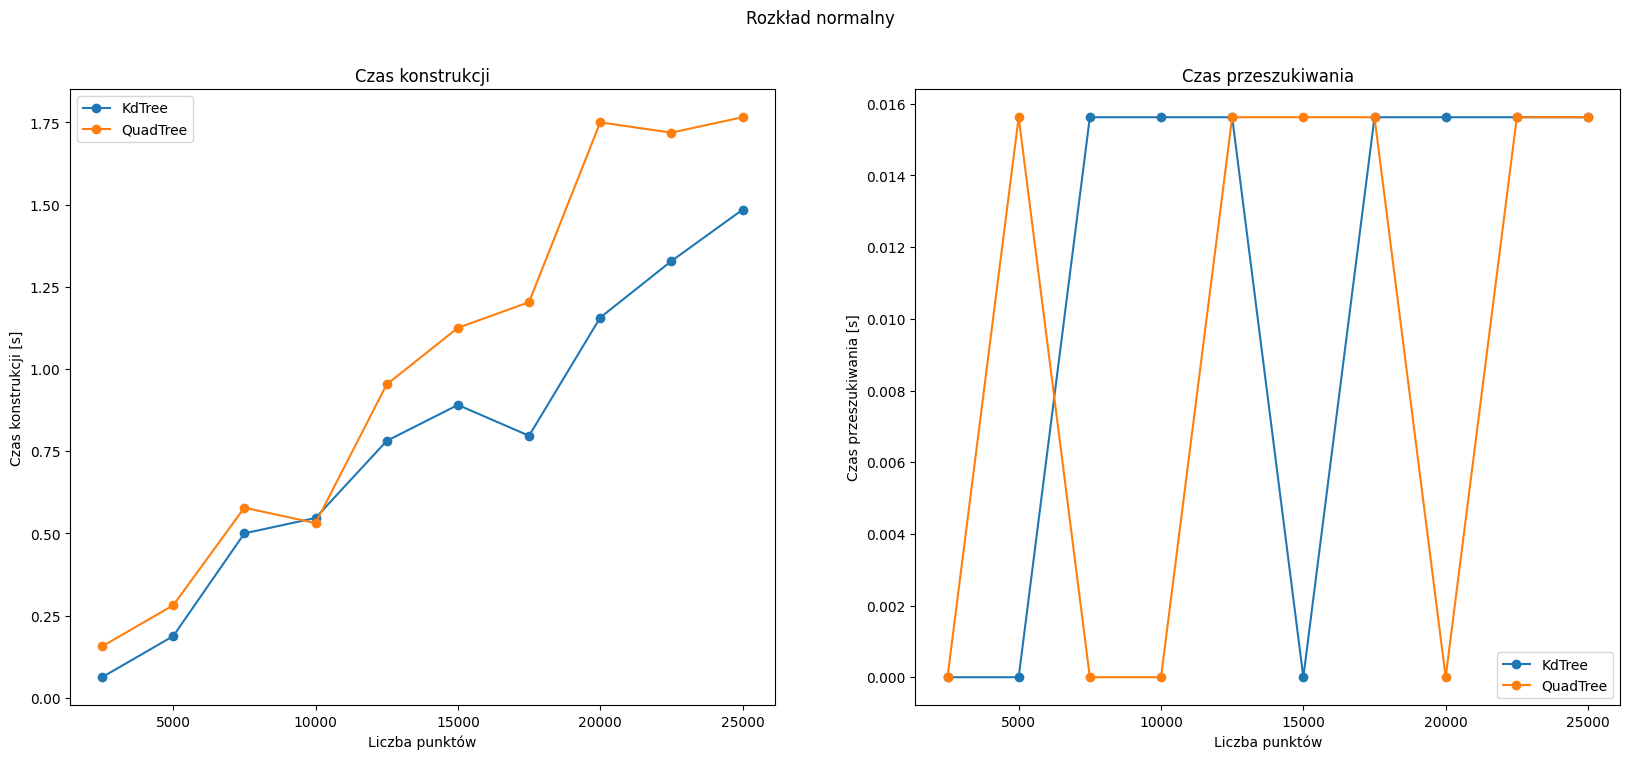

In [104]:
show_graphs(df2, "Rozkład normalny")

3.3 Rozkład "posadzka"

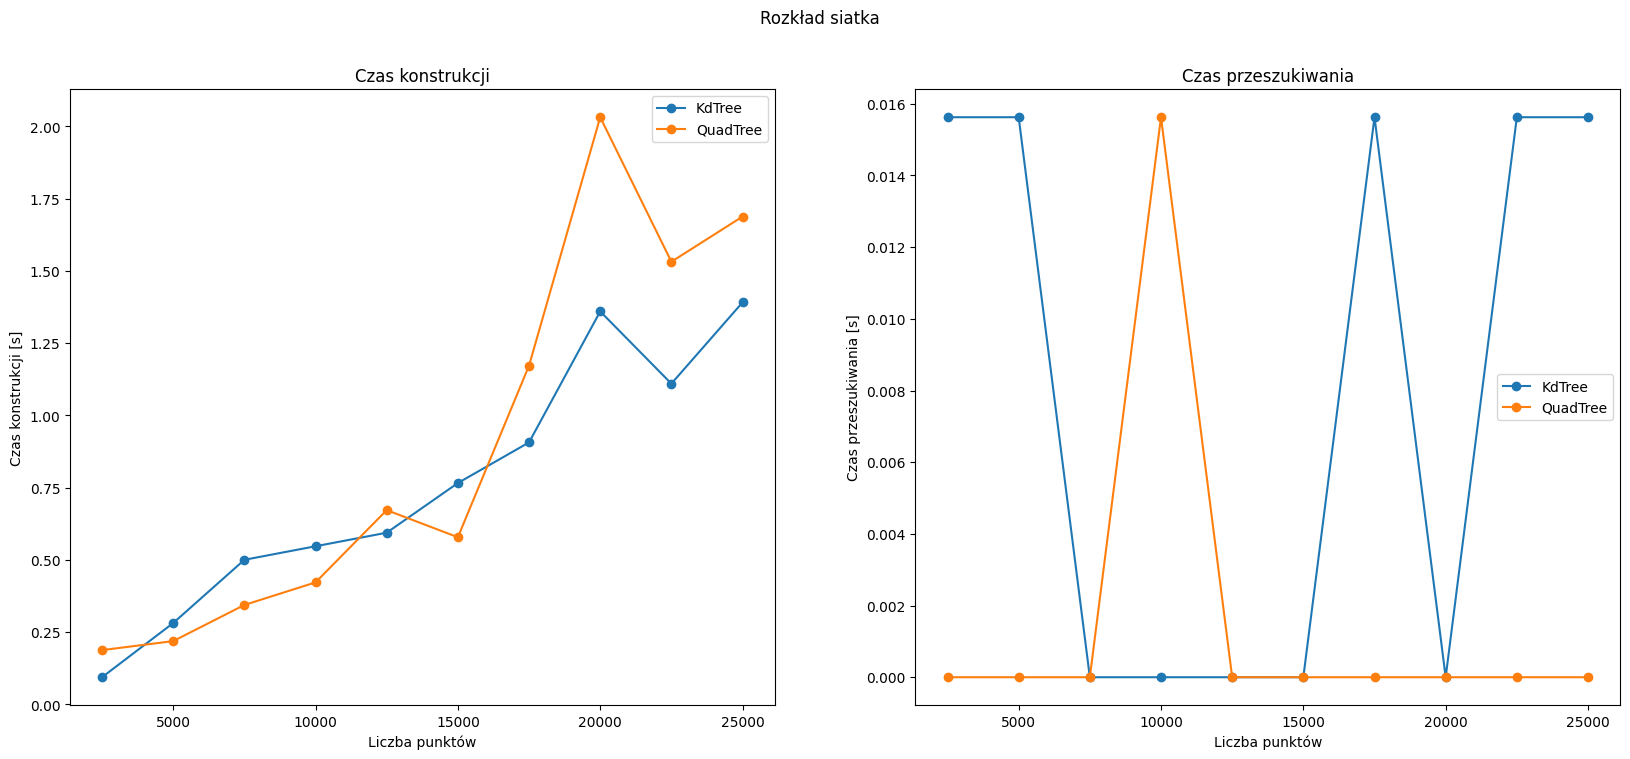

In [105]:
show_graphs(df3, "Rozkład siatka")

3.4 Rozkład klastrowy

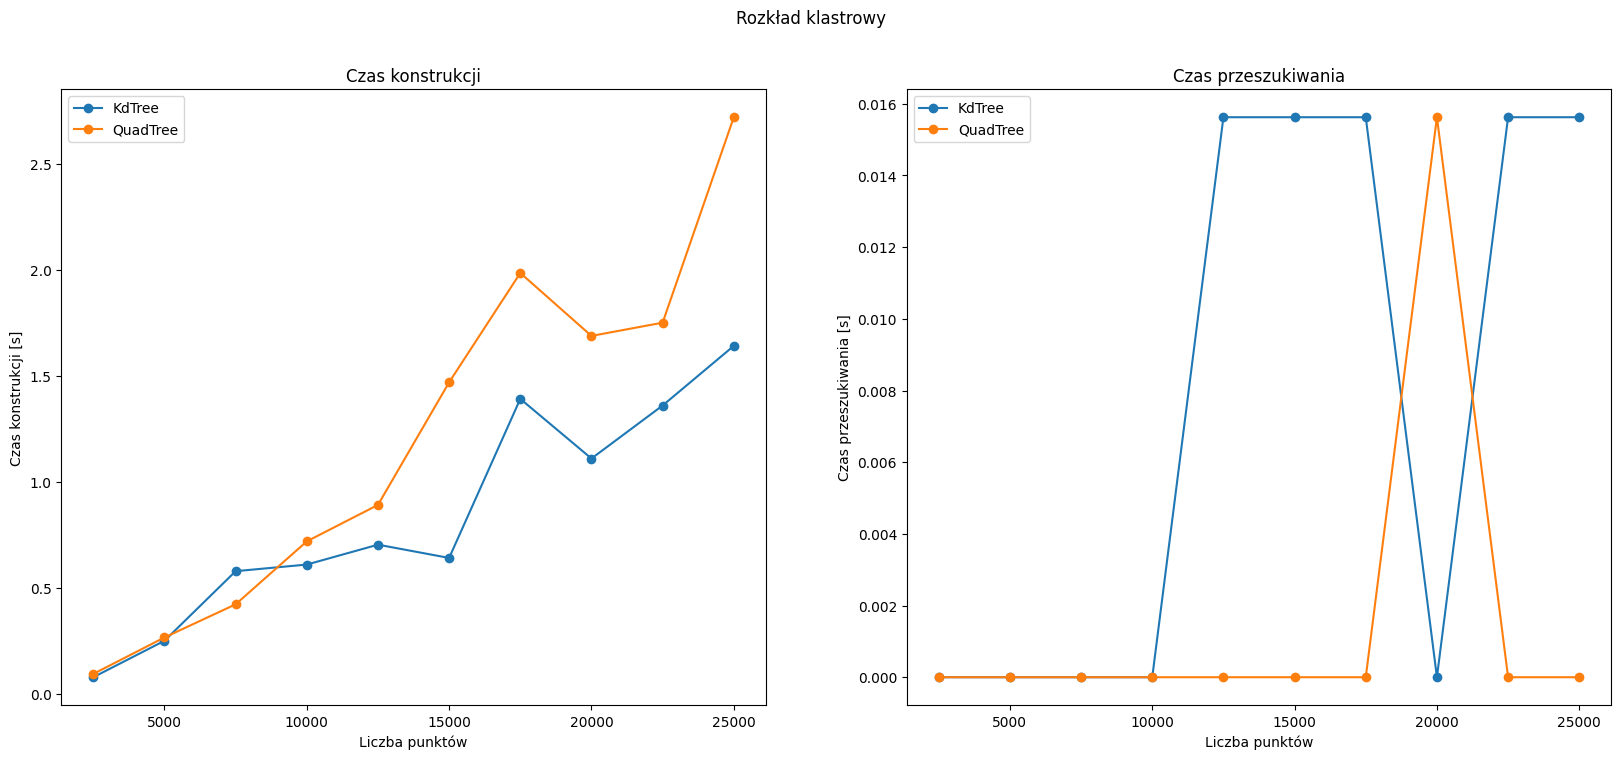

In [106]:
show_graphs(df4, "Rozkład klastrowy")

3.5 Rozkład z wartościami odstającymi

In [ ]:
show_graphs(df5, "Rozkład z odstającymi")

3.6 Rozkład krzyżowy

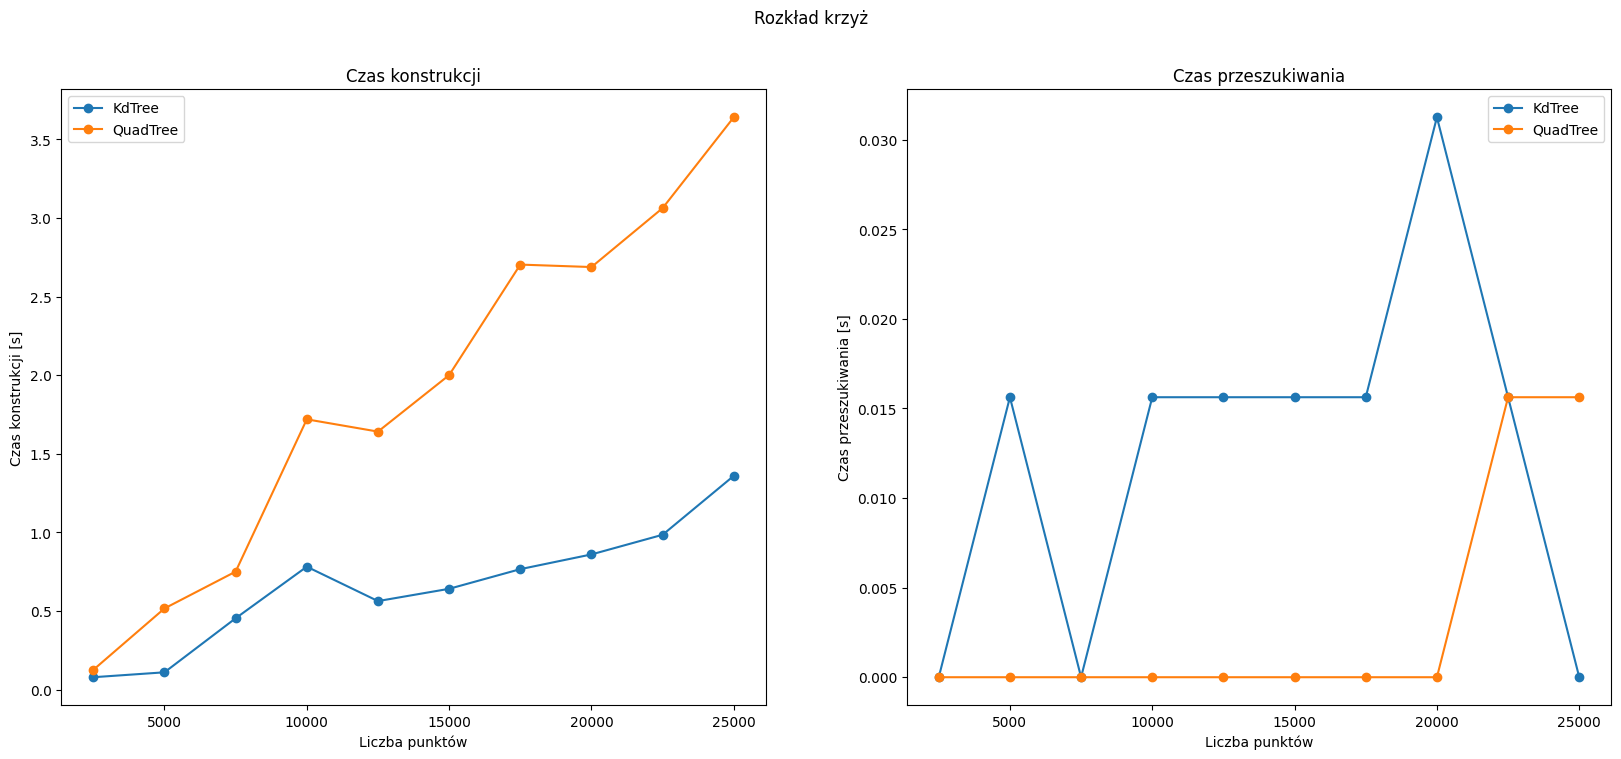

In [107]:
show_graphs(df6, "Rozkład krzyż")

3.7 Rozkład prostokątny

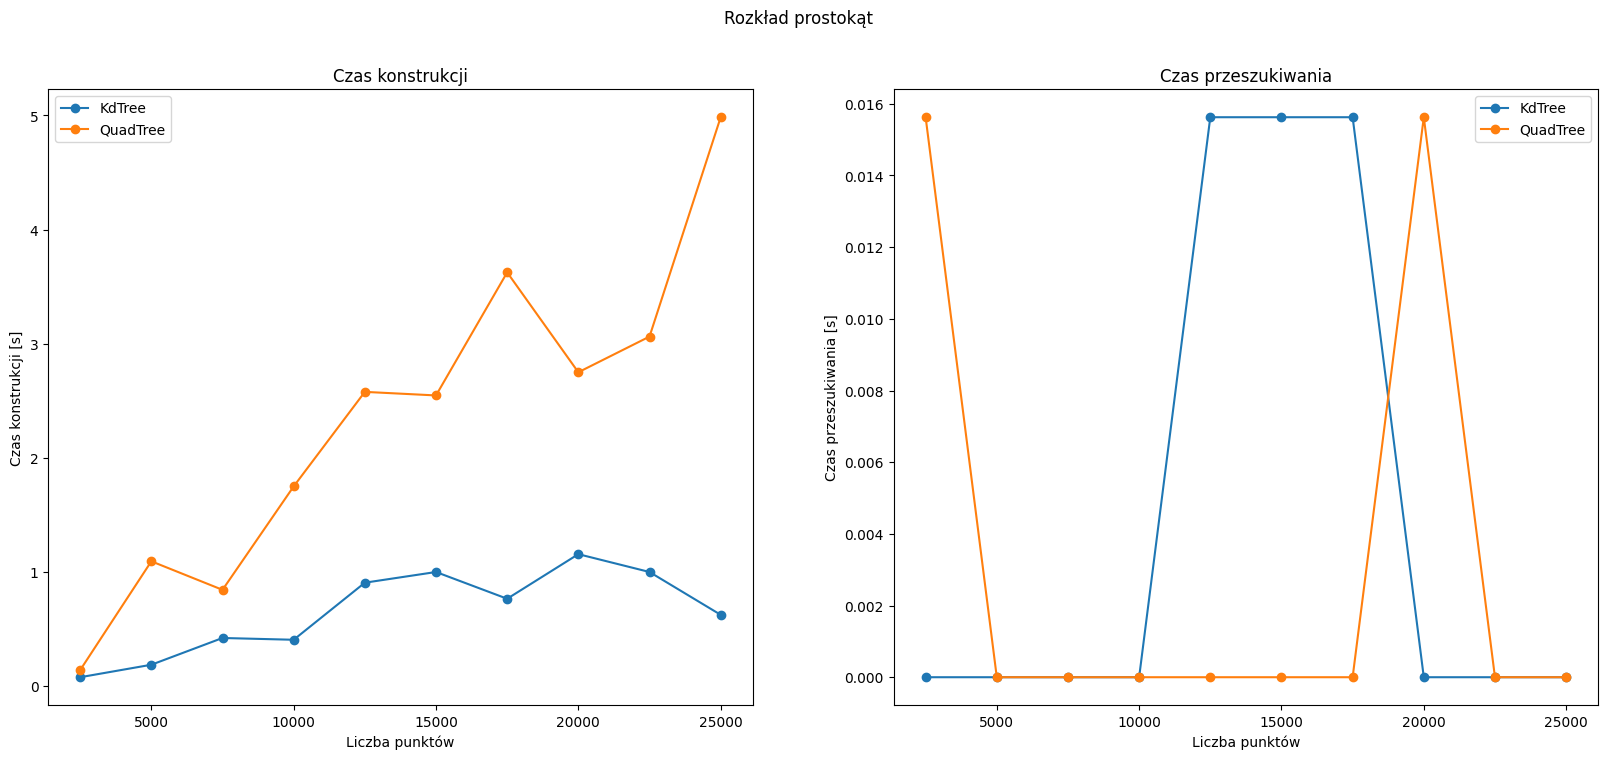

In [108]:
show_graphs(df7, "Rozkład prostokąt")

## 4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

4.1 Wydajność dla KDTree w zależności od ilości wymiarów

4.2 Wydajność dla QuadTree w zależności od wartości parametru `max_capacity`

------------------------------------------------------------------------------------------------------------------------------------------------